In [186]:
# https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera/

In [187]:

import cv2
import numpy as np
import matplotlib.pyplot as plt 
import glob
import imageio

from object_track_class import Object_Tracker


def downsample(img_arr, factor):
    return img_arr[::factor, ::factor]

In [188]:
###################
# Object Tracking #
###################

Obj_Track = Object_Tracker()

center_coor = (50, 50)
rad = 20
color_kalman = (255,0,0)
color_opt_flow = (0,0,255)
thick = 10

clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))

vid = cv2.VideoCapture(0)

In [189]:
# vid = cv2.VideoCapture(0)
# while(True):
#         ret, frame = vid.read()
#         frame_g = cv2.cvtColor(
#                 frame, 
#                 cv2.COLOR_BGR2GRAY)
        
#         # new_frame = cv2.Sobel(frame_g, cv2.CV_8U, dx=2, dy=2, ksize=5)
#         new_frame = cv2.medianBlur(frame_g, 1, 5)
#         ret,frame_b = cv2.threshold(new_frame, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
           
#         cv2.imshow(
#                 'frame', 
#                 np.hstack((frame_g, new_frame, frame_b))
#                 )
        
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#                 break
    
# vid.release()
# cv2.destroyAllWindows()
    

(2, 1)
(480, 640, 3) [[240]
 [320]]


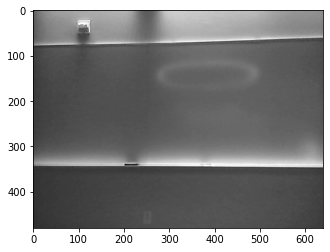

In [190]:
vid = cv2.VideoCapture(0)

init_buffer = list()
for _ in range(2):
    ret, frame = vid.read()
    frame_g = np.expand_dims(
        cv2.blur(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY),(1,1)),
        axis = 0)
    init_buffer.append(frame_g)
    
Obj_Track.INIT_RT(np.vstack(init_buffer))

print(frame.shape, Obj_Track.center_obs)
plt.imshow(frame_g[0,:,:], cmap="gray")

In [191]:
# plt.ion()
# fig = plt.figure()

count = 0
UPDATE_FRAME = 5
dsamp = 10

while(True):
    ret, frame = vid.read()
    frame_g = cv2.blur(cv2.cvtColor(
            frame, 
            cv2.COLOR_BGR2GRAY), (1,1))
    
    nframe = cv2.medianBlur(frame_g, 1, 1)
    # ret,frame_b = cv2.threshold(nframe, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
    frame_b = nframe   
      
    flag = (count%UPDATE_FRAME == 0)
    opt_flow_center, kalman_center = \
        Obj_Track.RUN_MOV_TRACK_RT(
            frame_b, 
            ds = dsamp, 
            update=flag)
        
    pic = np.abs(Obj_Track.of_mapx) + np.abs(Obj_Track.of_mapy)
    pic[pic < np.mean(pic)] = 0       
    # if flag:
    #     pic = np.abs(Obj_Track.of_mapx) + np.abs(Obj_Track.of_mapy)
    #     plt.imshow(
    #         pic,
    #         cmap="gray", 
    #         interpolation="nearest")
         
    #     plt.show()
    #     plt.pause(0.0001)
    
    count += 1
        
    frame = cv2.circle(
        frame, 
        kalman_center, 
        rad, 
        color_kalman, 
        thick)
    
    new_frame = cv2.circle(
        frame, 
        opt_flow_center,
        rad//2, 
        color_opt_flow, 
        -1)
    
    frame_b = cv2.cvtColor(frame_b, cv2.COLOR_GRAY2RGB)
    pic = cv2.resize(pic,(640,480))
    pic = cv2.cvtColor(pic.astype('uint8'), cv2.COLOR_GRAY2RGB) 
    
    
    cv2.imshow('frame', np.hstack((
        new_frame,pic 
        ))
        )
    
    save_name1 = "pic//" + str(count) + "frame" + ".png"
    cv2.imwrite(save_name1, new_frame)
    
    save_name2 = "of//" + str(count) +"of" + ".png"
    cv2.imwrite(save_name2, pic)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
vid.release()
cv2.destroyAllWindows()

In [ ]:
vid.release()
cv2.destroyAllWindows()